In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('Japanweather.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    10 non-null     int64  
 1   rad1    10 non-null     float64
 2   rad2    10 non-null     float64
 3   rad3    10 non-null     float64
 4   rad4    10 non-null     float64
 5   rad5    10 non-null     float64
 6   rad6    10 non-null     float64
 7   rad7    10 non-null     float64
 8   rad8    10 non-null     float64
 9   rad9    10 non-null     float64
 10  rad10   10 non-null     float64
 11  rad11   10 non-null     float64
 12  rad12   10 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 1.1 KB


In [4]:
#Overall descriptive statistic of the dataset
dataset.describe()

,year,rad1,rad2,rad3,rad4,rad5,rad6,rad7,rad8,rad9,rad10,rad11,rad12
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,2014.50000,7.990000,10.590000,13.910000,16.950000,19.390000,17.250000,15.750000,15.350000,12.650000,10.140000,7.700000,6.48000
std,3.02765,0.517365,0.998276,0.992696,1.554384,2.021798,1.154941,2.114106,2.452776,1.585525,1.518918,0.628932,0.32249
min,2010.00000,7.200000,9.100000,12.200000,14.500000,17.100000,15.800000,11.800000,10.800000,10.300000,7.600000,6.500000,5.90000
25%,2012.25000,7.575000,9.900000,13.125000,16.400000,18.100000,16.475000,15.025000,14.025000,11.250000,9.375000,7.450000,6.32500
50%,2014.50000,8.100000,10.750000,14.100000,16.950000,18.650000,16.800000,15.950000,15.750000,13.100000,10.400000,7.700000,6.50000
75%,2016.75000,8.275000,11.250000,14.500000,17.825000,21.075000,18.250000,16.800000,16.975000,13.750000,10.925000,8.000000,6.75000
max,2019.00000,8.900000,12.200000,15.300000,19.900000,22.700000,19.300000,19.300000,18.600000,14.800000,13.000000,8.800000,6.90000


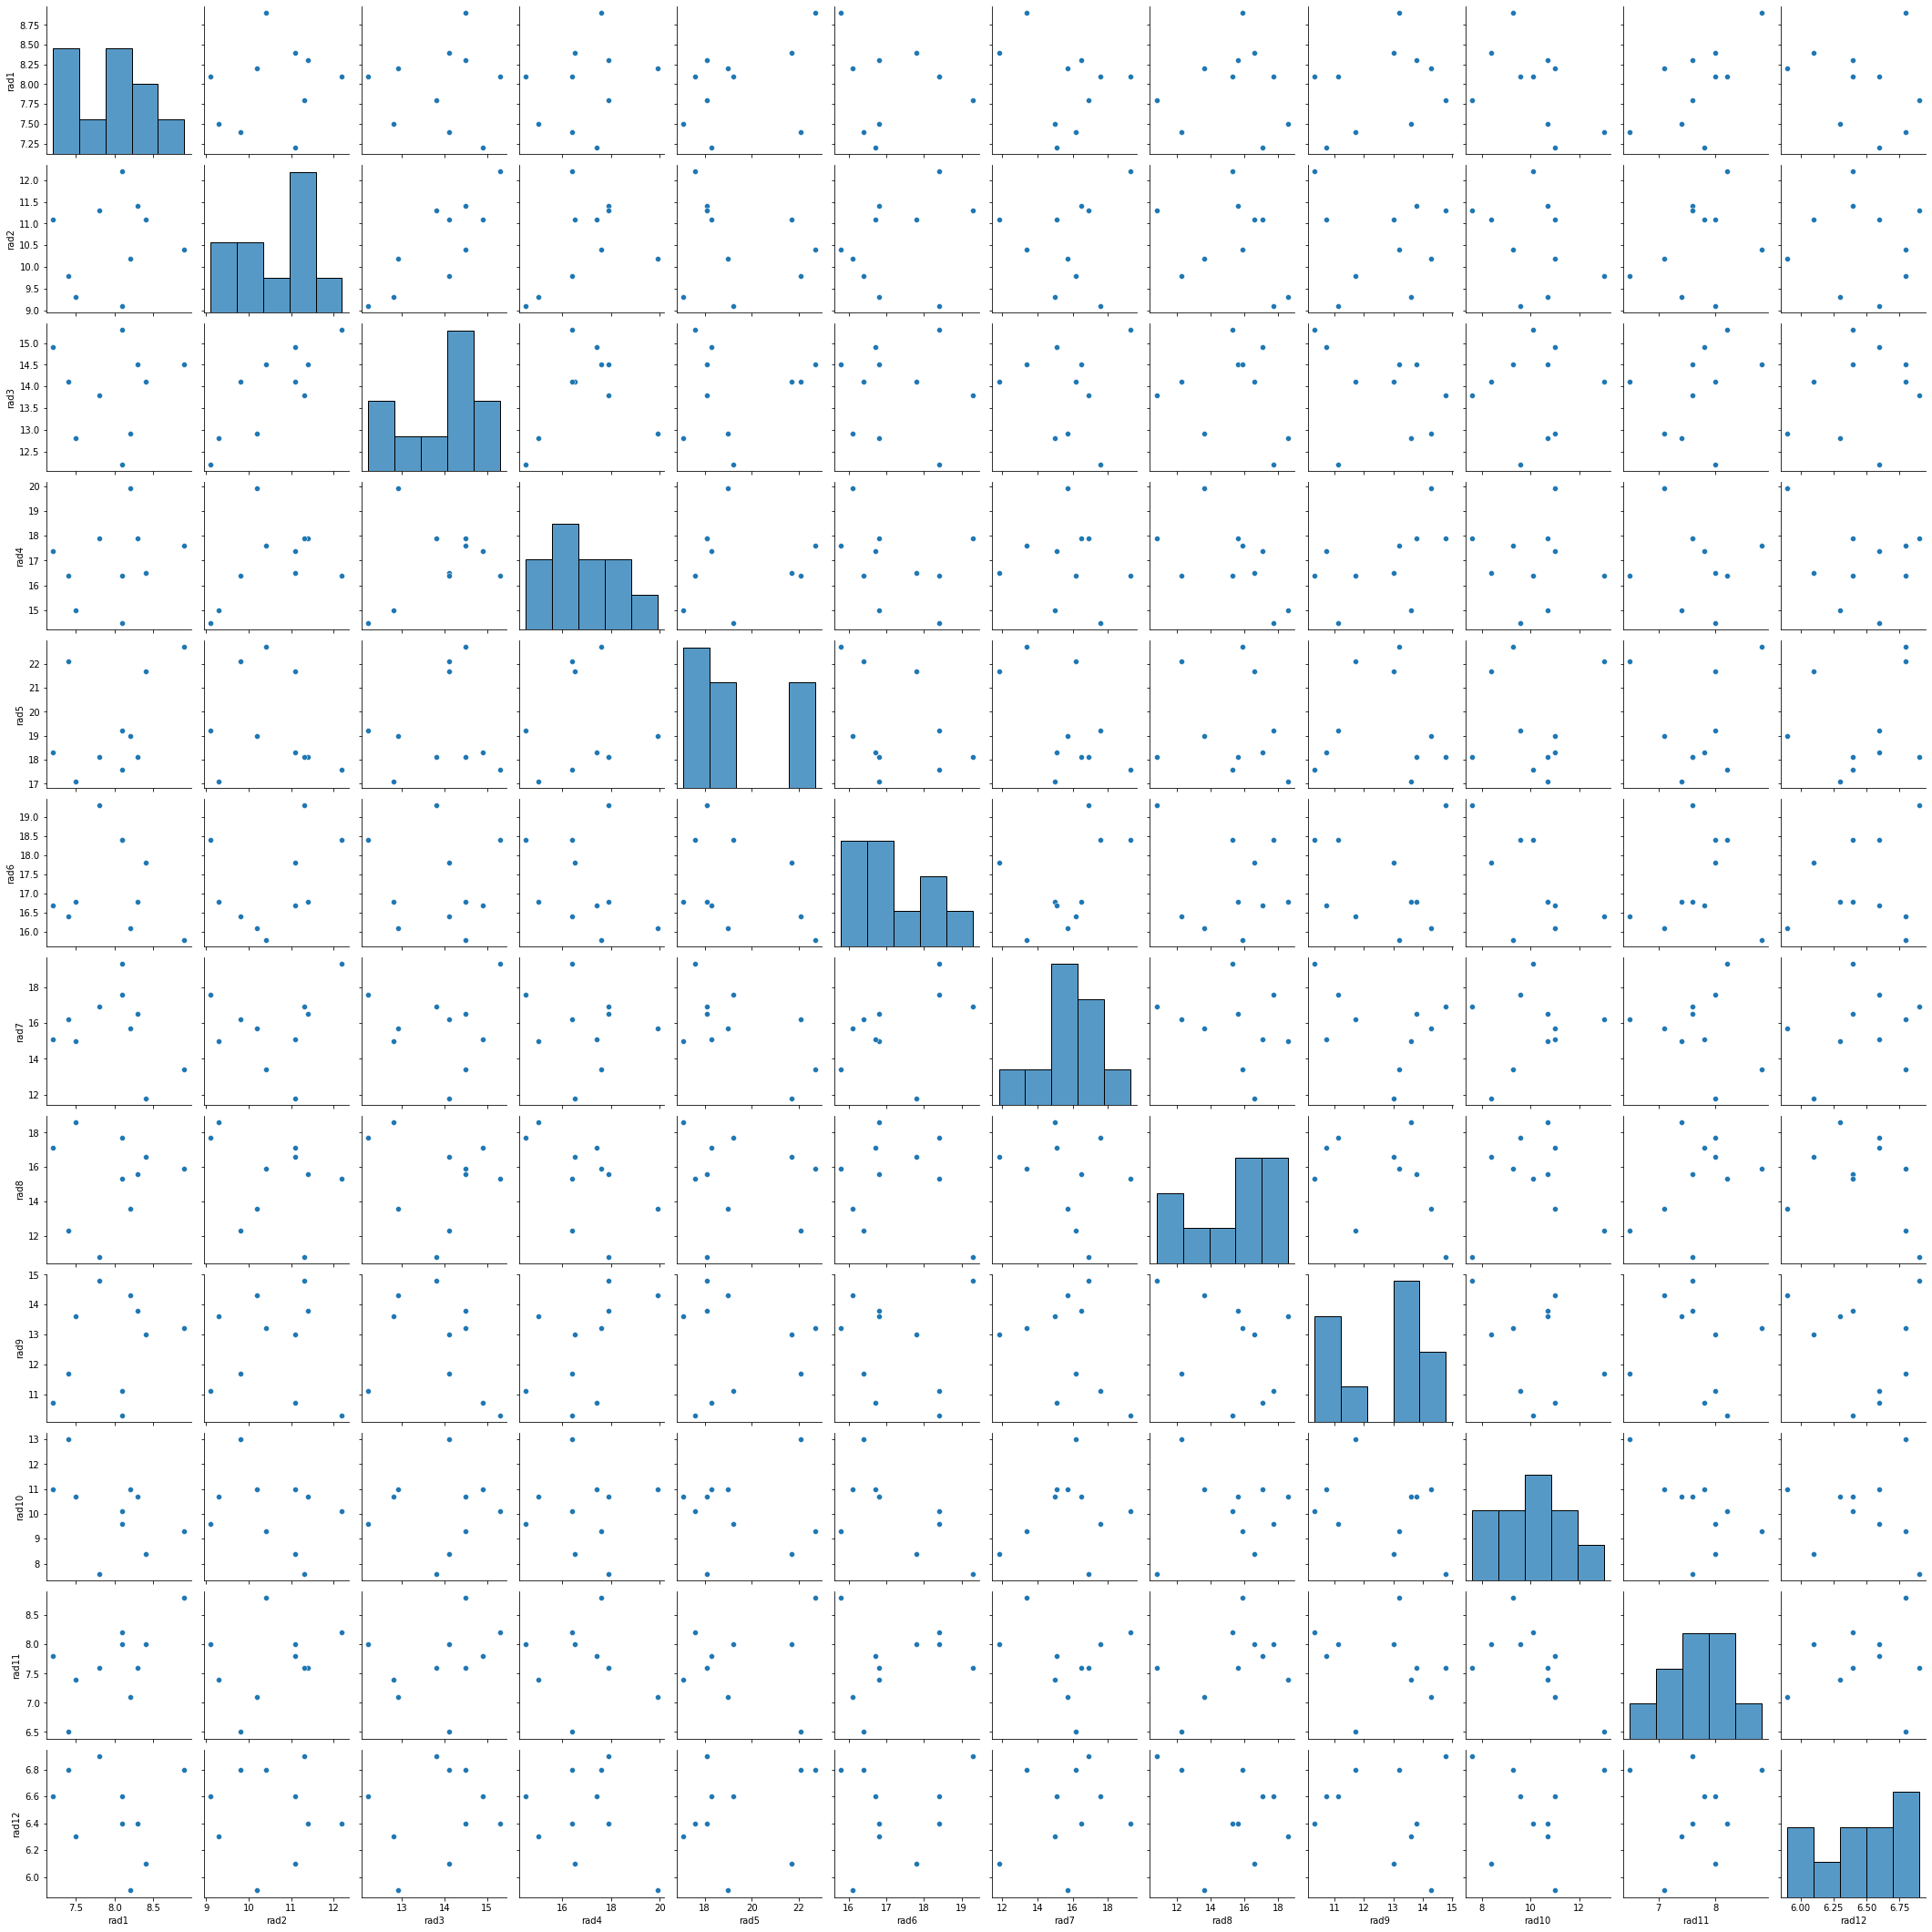

In [5]:
#Finding correlation between features of the dataset
sns.pairplot(dataset.iloc[:,1:])

In [7]:
X = dataset.iloc[:, [3, 9]]
X.head()

,rad3,rad9
0,12.2,11.1
1,14.5,13.8
2,12.8,13.6
3,14.1,13.0
4,12.9,14.3


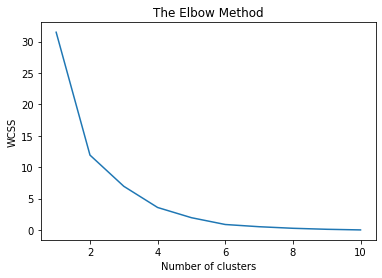

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  #Test 1 to 10 differnt clusters
#Loop over the indented statements 10 times to see how distance reduces till it becomes steady 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)  #Train the model for all the 10 clusters and append into wcss list
    
    '''kmeans.fit(X) generates the following parameters:
    KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001, verbose=0)
    inertia: Sum of squared distances of samples to their closest cluster center'''
    
    wcss.append(kmeans.inertia_) #Add each Sum of squared distances to wcss[] list
    
plt.plot(range(1, 11), wcss) # plot the ten different wcss against the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Fitting  K-Means to the dataset and predicting the clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
#The predicted cluster centers are stored in y_kmeans

In [13]:
#Adding the predicted clusters
X['Centroids'] = y_kmeans

#Now, different observations has been assigned to different cluster centers (centroids)
X

<ipython-input-13-f138c58e57b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Centroids'] = y_kmeans


,rad3,rad9,Centroids
0,12.2,11.1,0
1,14.5,13.8,1
2,12.8,13.6,1
3,14.1,13.0,1
4,12.9,14.3,1
5,14.1,11.7,0
6,14.9,10.7,0
7,13.8,14.8,1
8,15.3,10.3,0
9,14.5,13.2,1


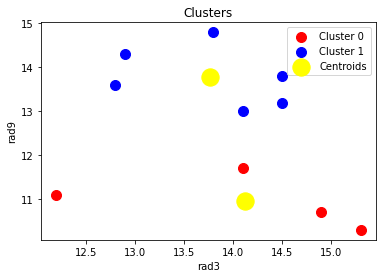

In [14]:
# unzip all values for all column in X DataFrame and store them in x(array)
x = X.values


# x[y_kmeans == 0, 0] is a conditional statement that prints the value of x[i] for all i in X, only if where y_kmeans ==0
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('rad3')
plt.ylabel('rad9')
plt.legend() #Show labels in all scatter plots as legend
plt.show()

# s = size of points
# c = color
# label = legend for cluster 1,2,3,4